# Import Libraries

In [1]:
import os
import os.path as ops
import time
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tools.image import ImageReader as VideoReader

In [2]:
video_reader = VideoReader()
# video_reader.start('../data/training_data/train/gt_image')
# video_reader.start('../data/training_data/val/gt_image')
video_reader.start('../data/images/20180914_015504_input_night')

Start image reader


In [3]:
image, filepath = video_reader.read()
filepath

'data/images/20180914_015504_input_night/000064.jpg'

In [4]:
yt = 300
yd = 550

# Manual

In [5]:
def std_filter(img):
    img_std = img.copy()
    img_std[yt:yd,:,:] = (img[yt:yd,:,:] - np.mean(img[yt:yd,:,:])) / np.std(img[yt:yd,:,:]) * 16 + 32
    img_std = np.array(img_std, dtype='uint8')
    
    return img_std

image_std = std_filter(image)

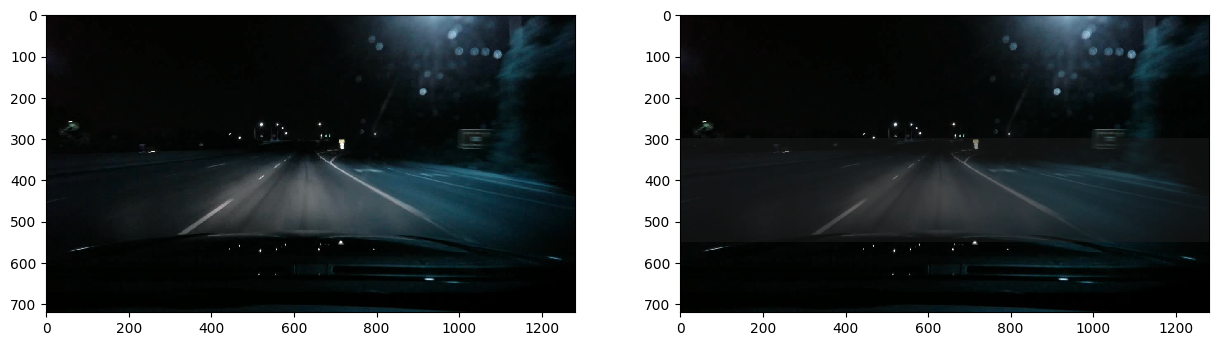

In [6]:
plt.figure(figsize=(15,15) , dpi=100)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image_std)
plt.show()

In [7]:
def add_gamma(img, gamma=1.0):
    gamma_cvt = np.zeros((256,1),dtype = 'uint8')

    for i in range(256):
        gamma_cvt[i][0] = 255 * (float(i)/255) ** (1.0/gamma)

    img_gamma = cv2.LUT(img, gamma_cvt)
    
    final = img.copy()
    final[yt:yd,:,:] = img_gamma[yt:yd,:,:]
    
    return final

image_gamma = add_gamma(image, gamma=2.0)

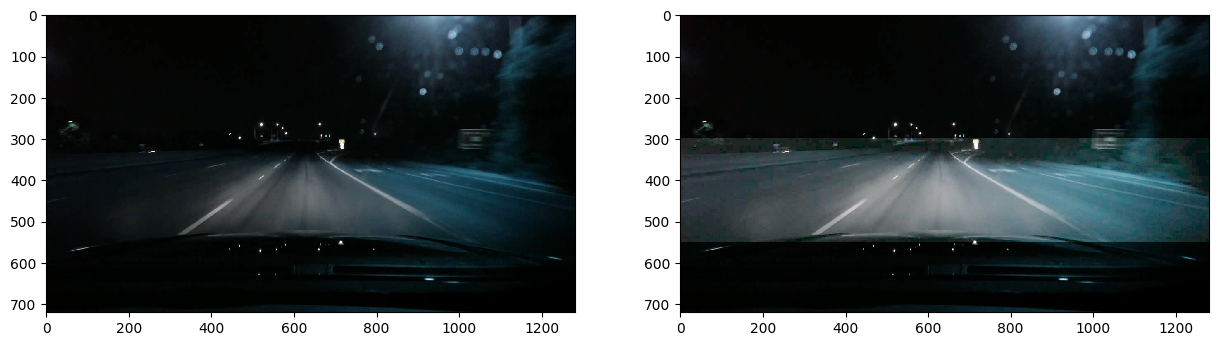

In [8]:
plt.figure(figsize=(15,15) , dpi=100)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image_gamma)
plt.show()

# Auto

In [9]:
def add_clahe(img, clim=2.0 , tile=8):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    clahe = cv2.createCLAHE(clipLimit=clim, tileGridSize=(tile,tile))
    img_yuv[yt:yd,:,0] = clahe.apply(img_yuv[yt:yd,:,0])

    img_cla = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    
    return img_cla

image_cla = add_clahe(image)

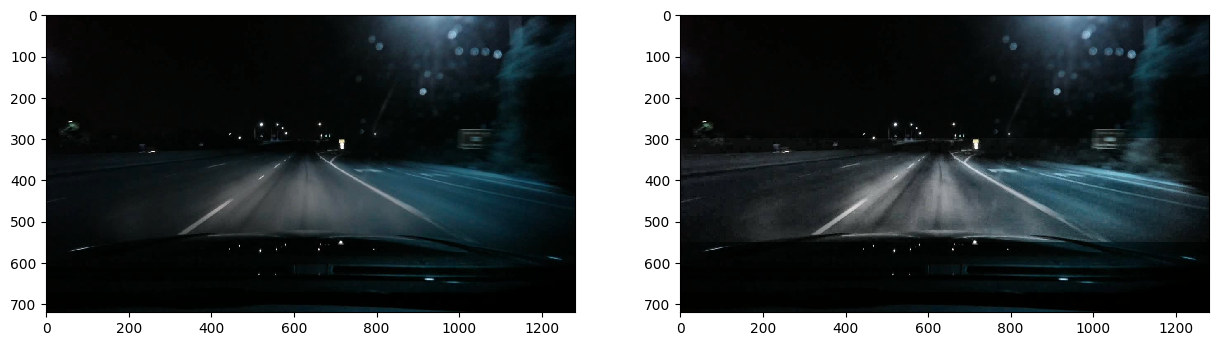

In [10]:
plt.figure(figsize=(15,15) , dpi=100)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image_cla)
plt.show()

In [11]:
def add_clahe_l(img, clim=2.0 , tile=8):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=clim, tileGridSize=(tile,tile))
    cl = l.copy()
    cl[yt:yd,:] = clahe.apply(l[yt:yd,:])

    limg = cv2.merge((cl,a,b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    return final

image_cla_l = add_clahe_l(image, clim=5.0)

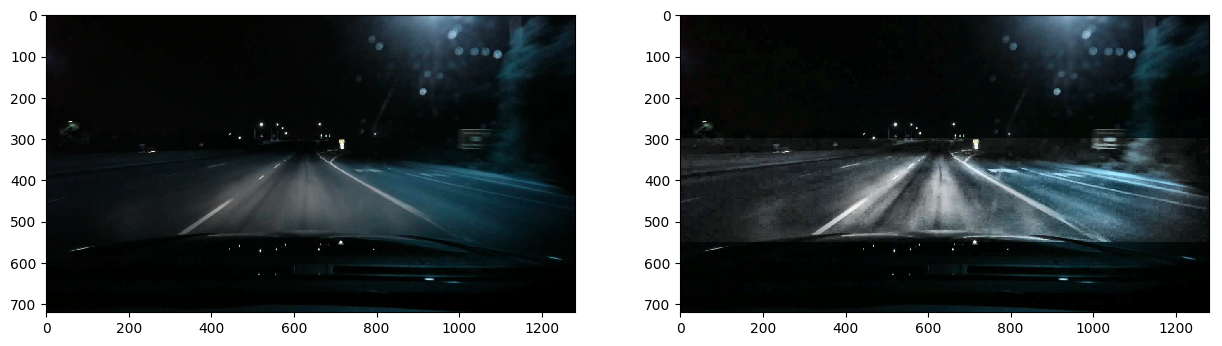

In [12]:
plt.figure(figsize=(15,15) , dpi=100)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image_cla_l)
plt.show()

In [13]:
def add_equalize(img, yt=300, yd=550):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    img_yuv[yt:yd,:,0] = cv2.equalizeHist(img_yuv[yt:yd,:,0])

    img_eql = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    
    return img_eql

image_eql = add_equalize(image)

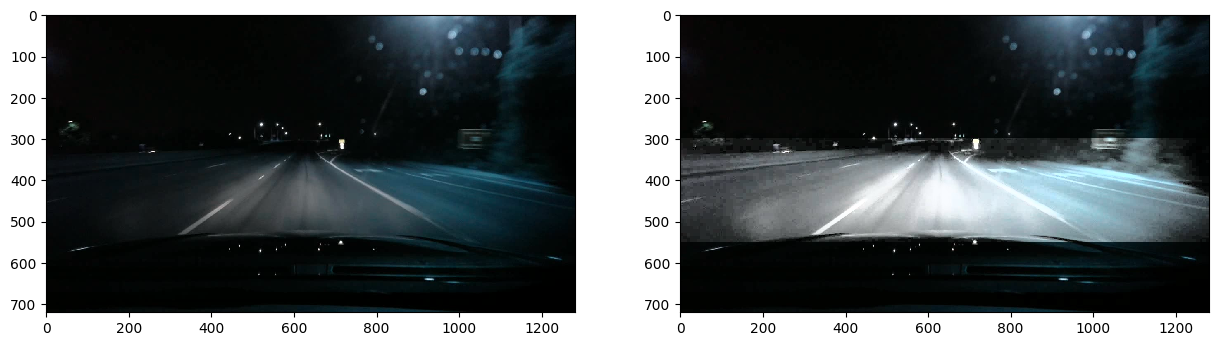

In [14]:
plt.figure(figsize=(15,15) , dpi=100)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image_eql)
plt.show()